In [1]:
from pyspark.sql import SparkSession
import pandas as pd

In [2]:
spark = SparkSession.builder.appName('Analise 1').getOrCreate()

22/01/24 22:59:13 WARN Utils: Your hostname, edudev resolves to a loopback address: 127.0.0.1; using 192.168.1.35 instead (on interface wlan0)
22/01/24 22:59:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/01/24 22:59:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read.csv("/home/edudev/Documents/trabalho_final/modules/csv/valor_producao(FAO).csv", encoding='utf-8', header=True, inferSchema=True)

In [4]:
df2 = spark.read.csv("/home/edudev/Documents/trabalho_final/novos_csv/FAOSTAT_data_1-17-2022.csv", encoding='utf-8', header=True, inferSchema=True)

In [5]:
df2

DataFrame[Domain Code: string, Domain: string, Area Code (FAO): int, Area: string, Element Code: int, Element: string, Item Code (FAO): int, Item: string, Year Code: int, Year: int, Unit: string, Value: int, Flag: string, Flag Description: string]

In [6]:
df1 = df.toPandas()

22/01/24 22:59:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Area, Item, Year, Value
 Schema: _c0, Area, Item, Year, Value
Expected: _c0 but found: 
CSV file: file:///home/edudev/Documents/trabalho_final/modules/csv/valor_producao(FAO).csv


In [7]:
df_brazil = df1.query("Area == 'Brazil'").sort_values(by='Value', ascending=False)

In [8]:
df_brazil['Item'].unique()

array(['Agriculture', 'Food', 'Crops', 'Livestock',
       'Meat indigenous total', 'Soybeans', 'Meat indigenous cattle',
       'Meat cattle', 'Meat chicken', 'Meat indigenous chicken',
       'Vegetables and Fruit Primary', 'Cereals Total', 'Sugar cane',
       'Sugar Crops Primary', 'Maize', 'Milk Total',
       'Milk whole fresh cow', 'Non Food', 'Coffee green',
       'Oilcrops Oil Equivalent', 'Meat pig', 'Meat indigenous pig',
       'Eggs hen in shell', 'Tomatoes', 'Roots and Tubers Total',
       'Seed cotton', 'Oranges', 'Beans dry', 'Rice paddy', 'Bananas',
       'Cassava', 'Grapes', 'Tobacco unmanufactured', 'Potatoes',
       'Pineapples', 'Wheat', 'Meat turkey', 'Meat indigenous turkey',
       'Papayas', 'Coconuts', 'Onions dry', 'Apples', 'Cashewapple',
       'Vegetables fresh nes', 'Cocoa beans',
       'Mangoes mangosteens guavas', 'Watermelons', 'Garlic',
       'Fruit tropical fresh nes', 'Meat sheep', 'Meat indigenous sheep',
       'Lemons and limes', 'Tangerine

In [9]:
df2 = df2.toPandas()

In [10]:
df2

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),515,Apples,1991,1991,1000 US$,101253,Fc,Calculated data
1,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),515,Apples,1992,1992,1000 US$,214811,Fc,Calculated data
2,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),515,Apples,1993,1993,1000 US$,177602,Fc,Calculated data
3,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),515,Apples,1994,1994,1000 US$,271676,Fc,Calculated data
4,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),515,Apples,1995,1995,1000 US$,295431,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),137,Yams,2014,2014,1000 US$,24547,Fc,Calculated data
2669,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),137,Yams,2015,2015,1000 US$,12397,Fc,Calculated data
2670,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),137,Yams,2016,2016,1000 US$,13977,Fc,Calculated data
2671,QV,Value of Agricultural Production,21,Brazil,57,Gross Production Value (current thousand US$),137,Yams,2017,2017,1000 US$,14415,Fc,Calculated data


In [11]:
df2 = df2.sort_values(by='Value', ascending=False)

In [12]:
nomes_produtos = df2['Item'].unique()[0:10]

In [13]:
nomes_produtos

array(['Soybeans', 'Meat, cattle', 'Meat indigenous, cattle',
       'Meat, chicken', 'Meat indigenous, chicken', 'Sugar cane', 'Maize',
       'Milk, whole fresh cow', 'Coffee, green', 'Meat, pig'],
      dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
top1 = df2[df2['Item'] == nomes_produtos[0]]
top2 = df2[df2['Item'] == nomes_produtos[1]]
top3 = df2[df2['Item'] == nomes_produtos[2]]
top4 = df2[df2['Item'] == nomes_produtos[3]]
top5 = df2[df2['Item'] == nomes_produtos[4]]
top6 = df2[df2['Item'] == nomes_produtos[5]]
top7 = df2[df2['Item'] == nomes_produtos[6]]
top8 = df2[df2['Item'] == nomes_produtos[7]]
top9 = df2[df2['Item'] == nomes_produtos[8]]
top10 = df2[df2['Item'] == nomes_produtos[9]]

In [16]:
df3 = pd.concat([top1, top2, top3, top4, top5, top6, top7, top8, top9, top10])

In [17]:
df3 = df3[['Item', 'Value', 'Year']]

In [18]:
df3

,Item,Value,Year
2237,Soybeans,40824194,2017
2233,Soybeans,38030063,2013
2234,Soybeans,37179445,2014
2232,Soybeans,33434200,2012
2236,Soybeans,33132009,2016
...,...,...,...
1296,"Meat, pig",1517614,1999
1299,"Meat, pig",1355311,2002
1290,"Meat, pig",1073435,1993
1289,"Meat, pig",1030222,1992


/home/edudev/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item', ylabel='Value'>

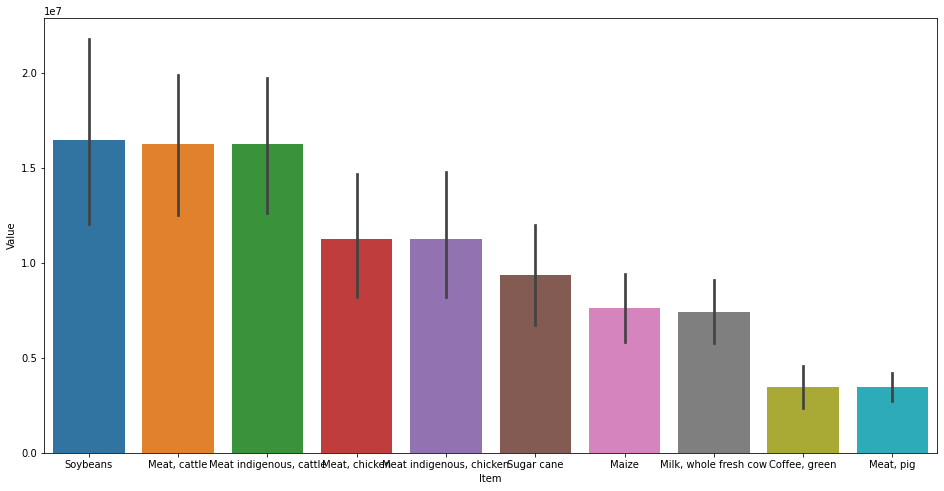

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(df3['Item'], df3['Value'])


In [20]:
soja = df3[df3['Item'] == nomes_produtos[0]]

In [21]:
cana = df3[df3['Item'] == nomes_produtos[5]]


In [22]:
milho = df3[df3['Item'] == nomes_produtos[6]]

In [23]:
cafe = df3[df3['Item'] == nomes_produtos[8]]

Text(0.5, 0, 'Anos')

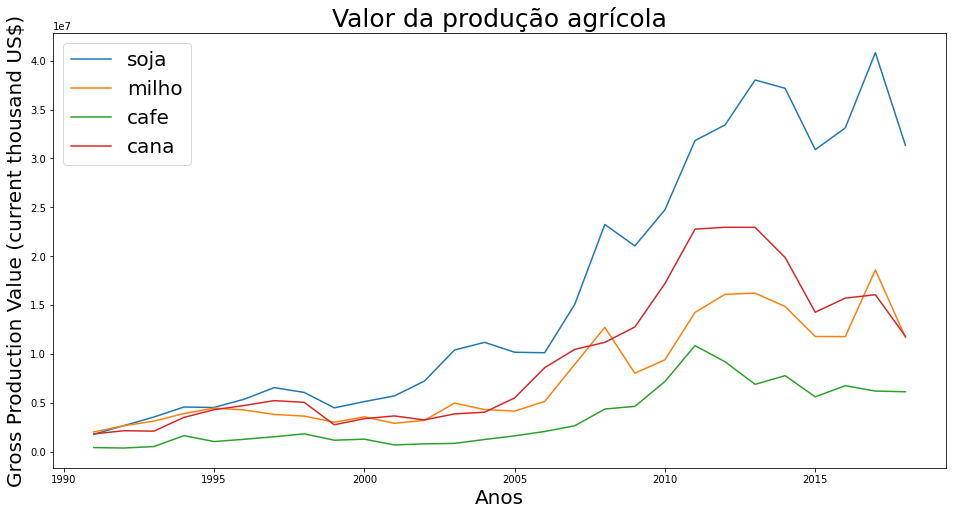

In [52]:
plt.figure(figsize=(16,8))
a1 = sns.lineplot(x=soja['Year'], y=soja['Value'])
a2 = sns.lineplot(x=milho['Year'], y=milho['Value'])
a3 = sns.lineplot(x=cafe['Year'], y=cafe['Value'])
a4 = sns.lineplot(x=cana['Year'], y=cana['Value'])
plt.legend(['soja', 'milho', 'cafe', 'cana'], loc='best', fontsize=20)
plt.title("Valor da produção agrícola", fontsize=25)
plt.ylabel("Gross Production Value (current thousand US$)", fontsize=20)
plt.xlabel("Anos", fontsize=20)

In [25]:
df4 = pd.read_csv("/home/edudev/Documents/trabalho_final/modules/csv/quantidade(FAO)_final.csv")

In [26]:
df4

,Unnamed: 0,Area,Item,Element,Year,Unit,Value
0,0,Afghanistan,Almonds com shell,Area harvested,1975,ha,0.0
1,1,Afghanistan,Almonds com shell,Area harvested,1976,ha,5900.0
2,2,Afghanistan,Almonds com shell,Area harvested,1977,ha,6000.0
3,3,Afghanistan,Almonds com shell,Area harvested,1978,ha,6000.0
4,4,Afghanistan,Almonds com shell,Area harvested,1979,ha,6000.0
...,...,...,...,...,...,...,...
3185931,3185931,Net Food Importing Developing Countries,Vegetables Primary,Production,2016,tonnes,82410550.0
3185932,3185932,Net Food Importing Developing Countries,Vegetables Primary,Production,2017,tonnes,82869948.0
3185933,3185933,Net Food Importing Developing Countries,Vegetables Primary,Production,2018,tonnes,84995942.0
3185934,3185934,Net Food Importing Developing Countries,Vegetables Primary,Production,2019,tonnes,87567535.0


In [27]:
df_brazil_area = df4[df4['Area'] == 'Brazil']
china_area = df4[df4['Area'] == 'China']
usa_area = df4[df4['Area'] == 'United States of America']
india_area = df4[df4['Area'] == 'India']

In [28]:
valor_producao_total_china = china_area[china_area['Element'] == 'Production'].groupby('Year').sum()
valor_producao_total_brazil = df_brazil_area[df_brazil_area['Element'] == 'Production'].groupby('Year').sum()['Value']
valor_producao_total_usa = usa_area[usa_area['Element'] == 'Production'].groupby('Year').sum()['Value']
valor_producao_total_india = india_area[india_area['Element'] == 'Production'].groupby('Year').sum()['Value']

In [29]:
producao_soja_brazil = df_brazil_area.query("Item == 'Soybeans' & Element == 'Production'")[['Year', 'Value']]
producao_soja_usa = usa_area.query("Item == 'Soybeans' & Element == 'Production'")[['Year', 'Value']]

In [30]:
valor_producao_total_brazil.values

array([2.49916844e+08, 2.64731099e+08, 2.74664425e+08, 2.87013283e+08,
       3.23342352e+08, 3.16852585e+08, 3.35281862e+08, 3.40780920e+08,
       3.43804390e+08, 3.62548704e+08, 3.68524668e+08, 3.84697551e+08,
       3.95537782e+08, 4.16706091e+08, 4.18348226e+08, 4.60647190e+08,
       5.01414528e+08, 5.01401921e+08, 5.31686062e+08, 5.85754965e+08,
       6.04812402e+08, 6.69588754e+08, 7.13746602e+08, 7.47616434e+08,
       8.20083277e+08, 7.98373606e+08, 8.83851500e+08, 8.69296723e+08,
       8.80730703e+08, 8.70756834e+08, 9.10740063e+08, 9.56614285e+08,
       9.05665929e+08, 1.02602894e+09, 1.07740606e+09, 1.07168536e+09,
       1.13136042e+09, 1.15645507e+09, 1.17305756e+09, 1.16453492e+09,
       1.23323676e+09, 1.29263622e+09, 1.41141396e+09, 1.46397614e+09,
       1.47426955e+09, 1.60678782e+09, 1.79258036e+09, 2.02244103e+09,
       2.08726969e+09, 2.19467010e+09, 2.26567160e+09, 2.23684816e+09,
       2.38493482e+09, 2.34189471e+09, 2.39712497e+09, 2.38318277e+09,
      

Text(0.5, 0, 'Anos')

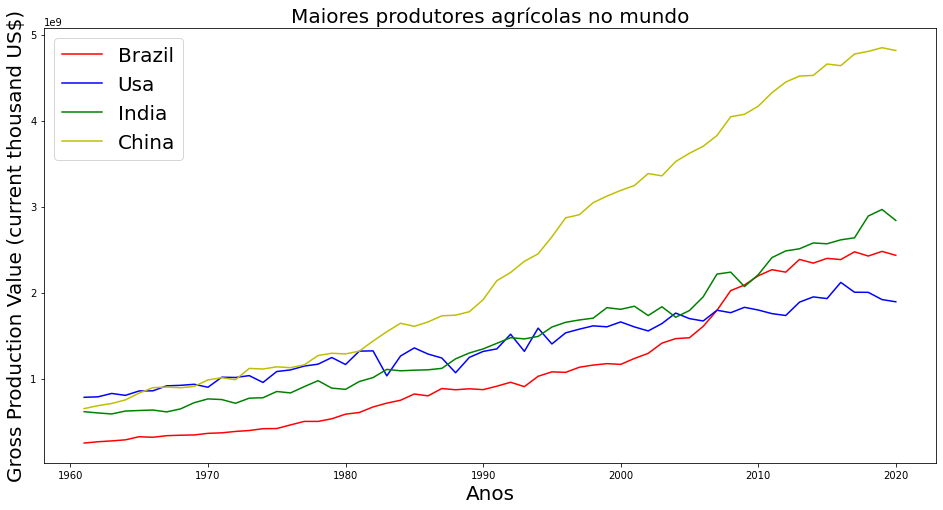

In [56]:
plt.figure(figsize=(16,8))
a1 = sns.lineplot(x =valor_producao_total_brazil.index, y=valor_producao_total_brazil.values, color="r")
a2 = sns.lineplot(x =valor_producao_total_usa.index, y=valor_producao_total_usa.values, color="b")
a2 = sns.lineplot(x =valor_producao_total_india.index, y=valor_producao_total_india.values, color="g")
a3 = sns.lineplot(x=valor_producao_total_china.index, y=valor_producao_total_china['Value'], color='y')
plt.legend(['Brazil', 'Usa', 'India', 'China'], loc='best', fontsize=20)
plt.title("Maiores produtores agrícolas no mundo", fontsize=20)
plt.ylabel("Gross Production Value (current thousand US$)", fontsize=20)
plt.xlabel("Anos", fontsize=20)

Text(0.5, 0, 'Anos')

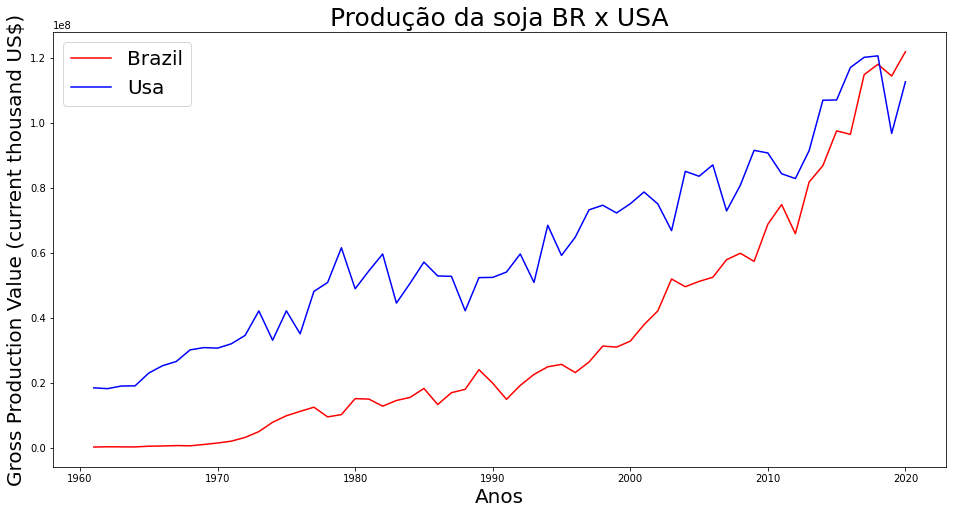

In [59]:
plt.figure(figsize=(16,8))
a1 = sns.lineplot(x=producao_soja_brazil['Year'], y=producao_soja_brazil['Value'], color="r")
a2 = sns.lineplot(x=producao_soja_usa['Year'], y=producao_soja_usa['Value'], color="b")
plt.legend(['Brazil', 'Usa',], loc='best', fontsize=20, title_fontsize=30)
plt.title("Produção da soja BR x USA", fontsize=25)
plt.ylabel("Gross Production Value (current thousand US$)", fontsize=20)
plt.xlabel("Anos", fontsize=20)

In [33]:
df4.Element.unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [34]:
df7 = df4.query("Element == 'Production'") - df4.query("Element == 'Area harvested'")

In [35]:
df4.query("Element == 'Production'")

,Unnamed: 0,Area,Item,Element,Year,Unit,Value
91,91,Afghanistan,Almonds com shell,Production,1975,tonnes,0.0
92,92,Afghanistan,Almonds com shell,Production,1976,tonnes,9800.0
93,93,Afghanistan,Almonds com shell,Production,1977,tonnes,9000.0
94,94,Afghanistan,Almonds com shell,Production,1978,tonnes,12000.0
95,95,Afghanistan,Almonds com shell,Production,1979,tonnes,10500.0
...,...,...,...,...,...,...,...
3185931,3185931,Net Food Importing Developing Countries,Vegetables Primary,Production,2016,tonnes,82410550.0
3185932,3185932,Net Food Importing Developing Countries,Vegetables Primary,Production,2017,tonnes,82869948.0
3185933,3185933,Net Food Importing Developing Countries,Vegetables Primary,Production,2018,tonnes,84995942.0
3185934,3185934,Net Food Importing Developing Countries,Vegetables Primary,Production,2019,tonnes,87567535.0


In [36]:
df4.query("Element == 'Area harvested'")

,Unnamed: 0,Area,Item,Element,Year,Unit,Value
0,0,Afghanistan,Almonds com shell,Area harvested,1975,ha,0.0
1,1,Afghanistan,Almonds com shell,Area harvested,1976,ha,5900.0
2,2,Afghanistan,Almonds com shell,Area harvested,1977,ha,6000.0
3,3,Afghanistan,Almonds com shell,Area harvested,1978,ha,6000.0
4,4,Afghanistan,Almonds com shell,Area harvested,1979,ha,6000.0
...,...,...,...,...,...,...,...
3185811,3185811,Net Food Importing Developing Countries,Vegetables Primary,Area harvested,2016,ha,7072849.0
3185812,3185812,Net Food Importing Developing Countries,Vegetables Primary,Area harvested,2017,ha,7086794.0
3185813,3185813,Net Food Importing Developing Countries,Vegetables Primary,Area harvested,2018,ha,7289541.0
3185814,3185814,Net Food Importing Developing Countries,Vegetables Primary,Area harvested,2019,ha,7399833.0


In [37]:
producao_soja_brazil_tonnes = df_brazil_area.query("Item == 'Soybeans' & Element == 'Production'")[['Year', 'Value']]
producao_soja_brazil_ha = df_brazil_area.query("Item == 'Soybeans' & Element == 'Area harvested'")[['Year', 'Value']]

In [38]:
df_resultado = pd.DataFrame(producao_soja_brazil_tonnes['Value'].values / producao_soja_brazil_ha['Value'].values, producao_soja_brazil_tonnes['Year'].values)

In [39]:
df_resultado.iloc[:, 0]

1961    1.126885
1962    1.100545
1963    0.950320
1964    0.847826
1965    1.211521
1966    1.212535
1967    1.169071
1968    0.906586
1969    1.166139
1970    1.143865
1971    1.210246
1972    1.470544
1973    1.386316
1974    1.531395
1975    1.698519
1976    1.749763
1977    1.769864
1978    1.225951
1979    1.240333
1980    1.727349
1981    1.765330
1982    1.564746
1983    1.792079
1984    1.649555
1985    1.800243
1986    1.452185
1987    1.859532
1988    1.712399
1989    1.971358
1990    1.732157
1991    1.553327
1992    2.035156
1993    2.124145
1994    2.163206
1995    2.199797
1996    2.249327
1997    2.297714
1998    2.353296
1999    2.372445
2000    2.403264
2001    2.710546
2002    2.573903
2003    2.802704
2004    2.300476
2005    2.230265
2006    2.379635
2007    2.813342
2008    2.816166
2009    2.636513
2010    2.947463
2011    3.121386
2012    2.636564
2013    2.928492
2014    2.865865
2015    3.028626
2016    2.904935
2017    3.378460
2018    3.390438
2019    3.1847

Text(0.5, 0, 'Years')

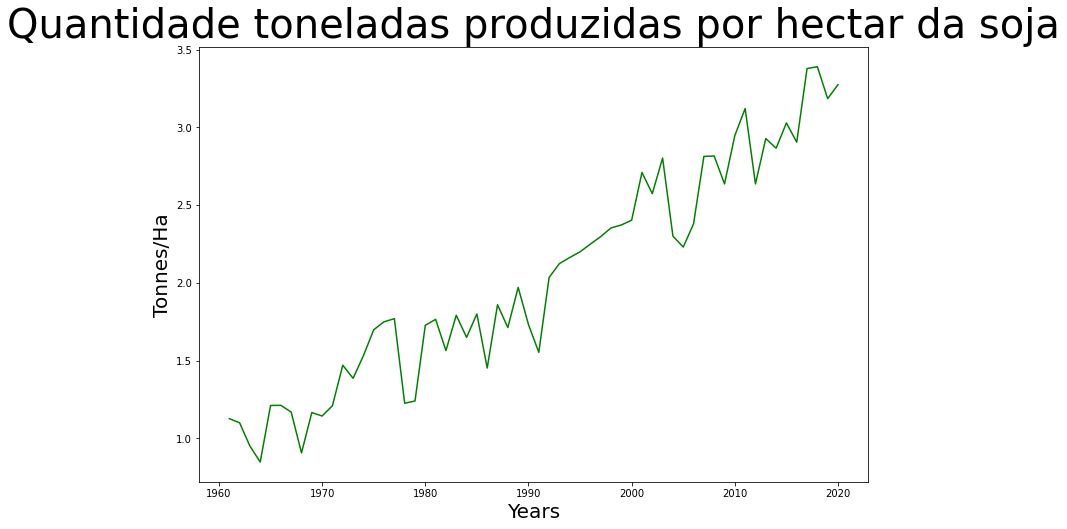

In [40]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=df_resultado.index, y=df_resultado.iloc[:, 0], color='g')
ax.set_title("Quantidade toneladas produzidas por hectar da soja", fontsize=40)
ax.set_ylabel("Tonnes/Ha", fontsize=20)
ax.set_xlabel("Years", fontsize=20)

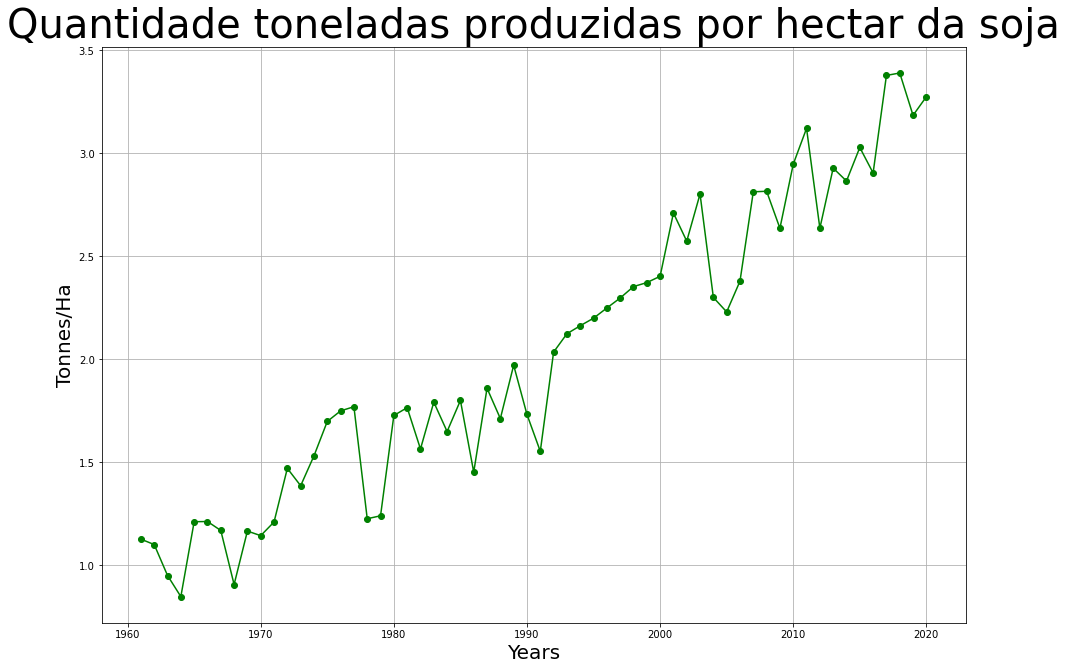

In [41]:
fig = plt.figure(figsize=(12,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df_resultado.index, df_resultado.iloc[:, 0], color='g', marker='o')

# eixo.set_xlim(1990, 2020)
eixo.set_title("Quantidade toneladas produzidas por hectar da soja", fontsize=40)
eixo.set_ylabel("Tonnes/Ha", fontsize=20)
eixo.set_xlabel("Years", fontsize=20)
# eixo.legend("Producao", loc='upper left', fontsize=16)
eixo.grid(True)

In [42]:
azul_esquerda = df_resultado[df_resultado.index <2000]
azul_direita = df_resultado[df_resultado.index >2010]
azul_esquerda.iloc[:, 0]

1961    1.126885
1962    1.100545
1963    0.950320
1964    0.847826
1965    1.211521
1966    1.212535
1967    1.169071
1968    0.906586
1969    1.166139
1970    1.143865
1971    1.210246
1972    1.470544
1973    1.386316
1974    1.531395
1975    1.698519
1976    1.749763
1977    1.769864
1978    1.225951
1979    1.240333
1980    1.727349
1981    1.765330
1982    1.564746
1983    1.792079
1984    1.649555
1985    1.800243
1986    1.452185
1987    1.859532
1988    1.712399
1989    1.971358
1990    1.732157
1991    1.553327
1992    2.035156
1993    2.124145
1994    2.163206
1995    2.199797
1996    2.249327
1997    2.297714
1998    2.353296
1999    2.372445
Name: 0, dtype: float64

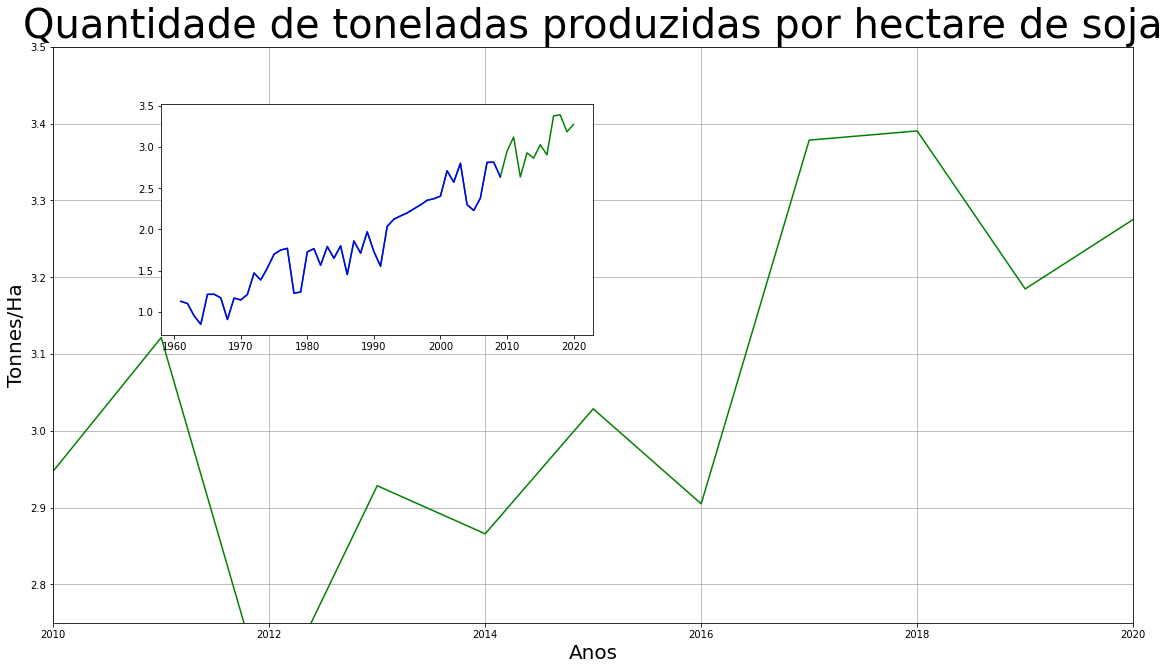

In [43]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])

eixo.set_xlim(2010, 2020)
eixo.set_ylim(2.75, 3.5)
eixo.plot(df_resultado.index, df_resultado.iloc[:, 0], color='g',)

eixo.set_title("Quantidade de toneladas produzidas por hectare de soja", fontsize=40)
eixo.set_ylabel("Tonnes/Ha", fontsize=20)
eixo.set_xlabel("Anos", fontsize=20)
# eixo.legend("Producao", loc='upper left', fontsize=16)
eixo.grid(True)

azul_esquerda = df_resultado[df_resultado.index <2010]
azul_direita = df_resultado[df_resultado.index >2020]

eixo2.plot(df_resultado.index, df_resultado.iloc[:, 0], color='g')
eixo2.plot(azul_esquerda.index, azul_esquerda.iloc[:, 0], color='b')
eixo2.plot(azul_direita.index, azul_direita.iloc[:, 0], color='b')


#fazer isso para evolucao agricola

In [44]:
producao_brazil = df_brazil_area.query("Element == 'Production'").groupby("Year").sum()

In [45]:
ag3 = producao_brazil[producao_brazil.index < 2010]
ag2 = producao_brazil[producao_brazil.index < 1990]
ag4 = producao_brazil[producao_brazil.index > 2010]

In [46]:
anus = producao_brazil.index

In [47]:
valores = producao_brazil['Value'].tolist()

In [48]:
print(list(zip(anus, valores)))

[(1961, 249916844.0), (1962, 264731099.0), (1963, 274664425.0), (1964, 287013283.0), (1965, 323342352.0), (1966, 316852585.0), (1967, 335281862.0), (1968, 340780920.0), (1969, 343804390.0), (1970, 362548704.0), (1971, 368524668.0), (1972, 384697551.0), (1973, 395537782.0), (1974, 416706091.0), (1975, 418348226.0), (1976, 460647190.0), (1977, 501414528.0), (1978, 501401921.0), (1979, 531686062.0), (1980, 585754965.0), (1981, 604812402.0), (1982, 669588754.0), (1983, 713746602.0), (1984, 747616434.0), (1985, 820083277.0), (1986, 798373606.0), (1987, 883851500.0), (1988, 869296723.0), (1989, 880730703.0), (1990, 870756834.0), (1991, 910740063.0), (1992, 956614285.0), (1993, 905665929.0), (1994, 1026028937.0), (1995, 1077406062.0), (1996, 1071685356.0), (1997, 1131360424.0), (1998, 1156455071.0), (1999, 1173057558.0), (2000, 1164534920.0), (2001, 1233236761.0), (2002, 1292636220.0), (2003, 1411413962.0), (2004, 1463976140.0), (2005, 1474269549.0), (2006, 1606787821.0), (2007, 1792580363.0)

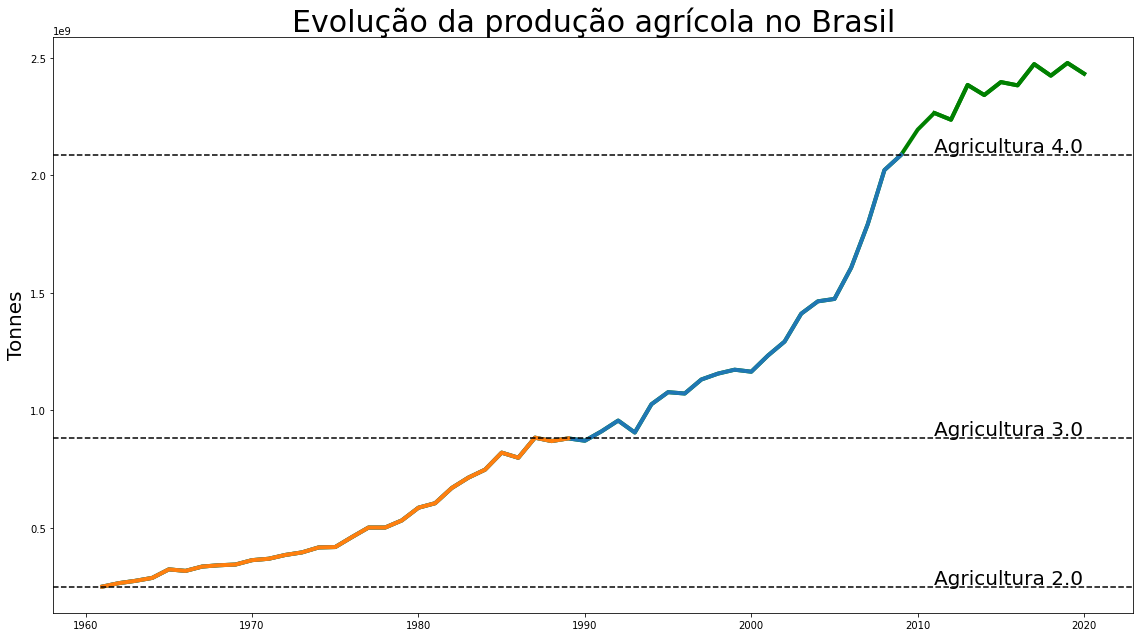

In [49]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(producao_brazil.index, producao_brazil['Value'], color='g', lw=4)
eixo.plot(ag3.index, ag3['Value'], lw=4)
eixo.plot(ag2.index, ag2['Value'], lw=4)
eixo.plot(ag4.index, ag4['Value'], color='g', lw=4)
eixo.set_title('Evolução da produção agrícola no Brasil', fontsize=30)
eixo.set_ylabel("Tonnes", fontsize=20)

x1 = ag2.index.min()
y1 = ag2['Value'].max()

x2 = ag2.index.min() + 50
y2 = ag2['Value'].min() + 10005000

eixo.annotate("Agricultura 2.0", xy=(x1, y1), fontsize = 20, xytext=(x2, y2))

x1 = ag2.index.min()
y1 = ag2['Value'].max()

x2 = ag2.index.min() + 50
y2 = ag2['Value'].max() +10005000

eixo.annotate("Agricultura 3.0", xy=(x1, y1), fontsize = 20, xytext=(x2, y2))

x1 = ag3.index.max()
y1 = ag3['Value'].max()

x2 = ag3.index.min() + 50
y2 = ag3['Value'].max() +10005000

eixo.annotate("Agricultura 4.0", xy=(x1, y1), fontsize = 20, xytext=(x2, y2))

eixo.axhline(max(ag3['Value']), color='k', linestyle='--')
eixo.axhline(max(ag2['Value']), color='k', linestyle='--')
eixo.axhline(min(ag2['Value']), color='k', linestyle='--')

In [50]:
#Fatia de porcentagem do pib brasileiro da agropecuaria variou durante os anos 
# analise pelos 4 maiores produtos em relacao aos outros paises.. resolucoes de problemas..